## Analyzing google_search_history script

In [1]:
from google_search_history import process
from tests import test_google_search_history, simulation_google_search_history
from pathlib import Path
import pandas as pd
import io

### 1. Testing functionality of script

In [2]:
test_google_search_history.test_extract() # if not AssertionError: outcome is as expected

In [3]:
test_google_search_history.test_process() # if not AssertionError: outcome is as expected

### 2. Use case: simulated Google Takeout data

In [4]:
# # Create seeded simulation data
# file_data = POC_google_search_history.BrowserHistory(
#         n=1000, site_diff=0.15, time_diff=True, seed=0, fake=False)
# POC_google_search_history.__createZip(file_data)

In [5]:
data = Path('tests/data/takeout.zip') # Enter path to takeout.zip data
output = process(data)

In [6]:
print(output['summary'])

 
    With this research we want to invesitgate how news consumption has changed during/after the COVID-19 related Dutch 
    curfew. To examine this, we looked at your Google Search History. First, we divided your browser history into three 
    periods: before the start of the curfew (before 2021-01-23), during the curfew (between 2021-01-23 and 2021-04-28) 
    and post curfew (after 2021-04-28). For each period, we counted how many times you searched for a news website 
    versus any another type of website (i.e., news/other). While counting, we also took the time of day 
    (i.e., morning/afternoon/evening/night) into account. 
     
    read_files: BrowserHistory.json
    Your earliest web search was on 2020-10-20, 
    The Dutch curfew took place between 2021-01-23 and 2021-04-28,
    Your latest web search was on 2021-07-23.
    


In [7]:
overview = output['data_frames'][0]
overview

,Curfew,Website,Time,Searches
0,before,news,morning,10
1,before,news,afternoon,18
2,before,news,evening,11
3,before,news,night,11
4,before,other,morning,73
5,before,other,afternoon,65
6,before,other,evening,70
7,before,other,night,74
8,during,news,morning,21
9,during,news,afternoon,22


In [8]:
curf_web = overview.groupby(['Website']).sum()
curf_web['%'] = curf_web.apply(lambda x: x/x.sum())
curf_web

,Searches,%
Website,,
news,200,0.2
other,800,0.8


In [9]:
curf_web = overview.groupby(['Curfew', 'Website']).sum()
curf_web['%'] = curf_web.groupby(level=0).apply(lambda x: x/x.sum())
curf_web

Searches         %
Curfew Website                    
before news           50  0.150602
       other         282  0.849398
during news          100  0.296736
       other         237  0.703264
post   news           50  0.151057
       other         281  0.848943

In [10]:
curf_time_web = overview.groupby(['Curfew', 'Time', 'Website']).sum()
curf_time_web['%'] = curf_time_web.groupby(['Curfew', 'Time']).apply(lambda x: x/x.sum())
curf_time_web

Searches         %
Curfew Time      Website                    
before afternoon news           18  0.216867
                 other          65  0.783133
       evening   news           11  0.135802
                 other          70  0.864198
       morning   news           10  0.120482
                 other          73  0.879518
       night     news           11  0.129412
                 other          74  0.870588
during afternoon news           22  0.328358
                 other          45  0.671642
       evening   news           39  0.293233
                 other          94  0.706767
       morning   news           21  0.313433
                 other          46  0.686567
       night     news           18  0.257143
                 other          52  0.742857
post   afternoon news           16  0.195122
                 other          66  0.804878
       evening   news           13  0.154762
                 other          71  0.845238
       morning   news           10  0.119048
                 other          74  0.880952
       night     news           11  0.135802
                 other          70  0.864198

<AxesSubplot:xlabel='Website', ylabel='Searches'>

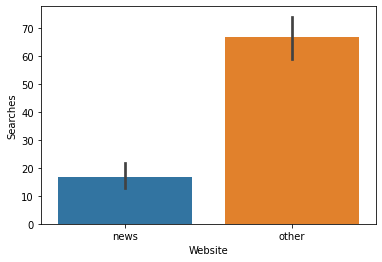

In [11]:
import seaborn as sns
sns.barplot(x='Website', y='Searches', data=overview)

### Browser history at different moments 
#### Number of news vs. other searches before, during and after the curfew

<AxesSubplot:xlabel='Curfew', ylabel='Searches'>

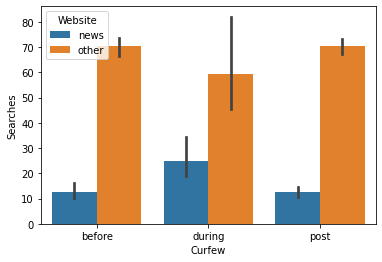

In [12]:
sns.barplot(x='Curfew', y='Searches', hue='Website', data=overview)

### Browser history at different times of the day
#### Number of news vs. other searches at different times before the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

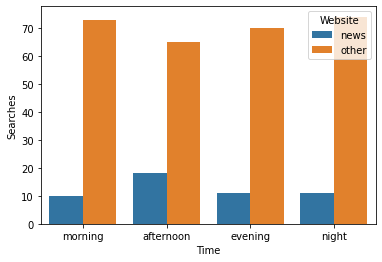

In [13]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'before'])

#### Number of news vs. other searches at different times during the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

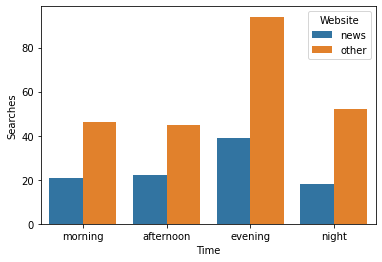

In [14]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'during'])

#### Number of news vs. other searches at different times after the curfew

<AxesSubplot:xlabel='Time', ylabel='Searches'>

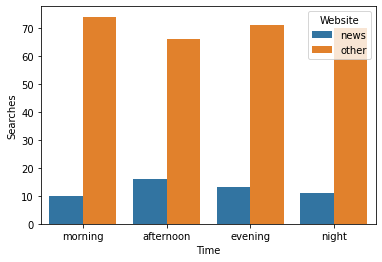

In [15]:
sns.barplot(x='Time', y='Searches', hue='Website', data=overview[overview['Curfew'] == 'post'])